#**2017331088 Roman Raihan**

#**DIGITAL-TO-ANALOG CONVERSION**

####Three meachanisms for modulating digital data into an analog signal:####
1. Amplitude Shift Keying(ASK)
2. Frequency Shift Keying(FSK)
3. Phase Shift Keying(PSK)

*importing necessary libraries*



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

**$Unipolar$ - $NRZ$ Encoding**

In [ ]:
def compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time):
  '''
  bits      -      Digital data elements(input bits row vector)
  Time      -      Time period for sending 1 data elements
  bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
  N         -      Bit Length of input bits
  T         -      Digital Signal per bit
  x         -      Unipolar_NRZ Line coding row vector(Digital Signal)
  t         -      Time vector for Digial Signal
  '''
  x = np.array([])
  for i in range(N):
    temp = bits[i]* np.ones((T))
    x = np.append(x, temp)
  t = np.linspace(0,N*Time,len(x))
  return [t, x]

def plot_signal(t, x):
  '''
  t - Time vector for a Signal
  x - Signal element
  '''
  plt.figure(figsize=(18, 6))
  plt.plot(t, x)
  plt.show()

##**Amplitude Shift Keying(ASK)**

**Step 1: $Unipolar$ - $NRZ$ Encoding**

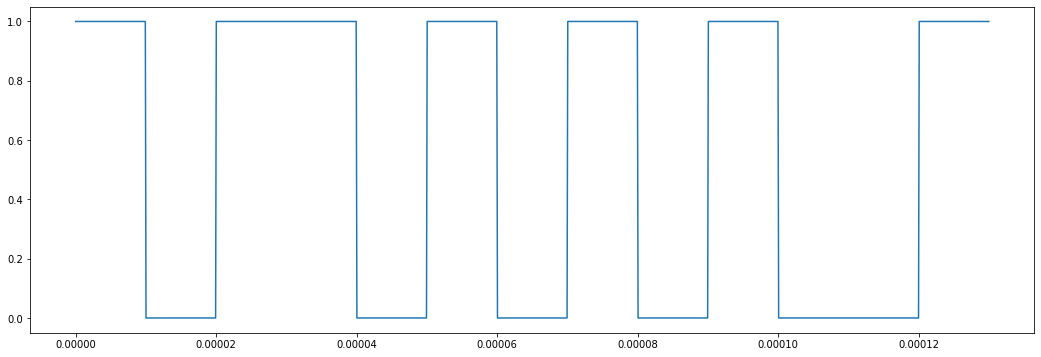

In [ ]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
N         -      Bit Length of input bits
T         -      Digital Signal per bit
x         -      Line coding row vector(Digital Signal)
t         -      Time vector for Digial Signal
'''

bits = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Creating a Carrier signal**

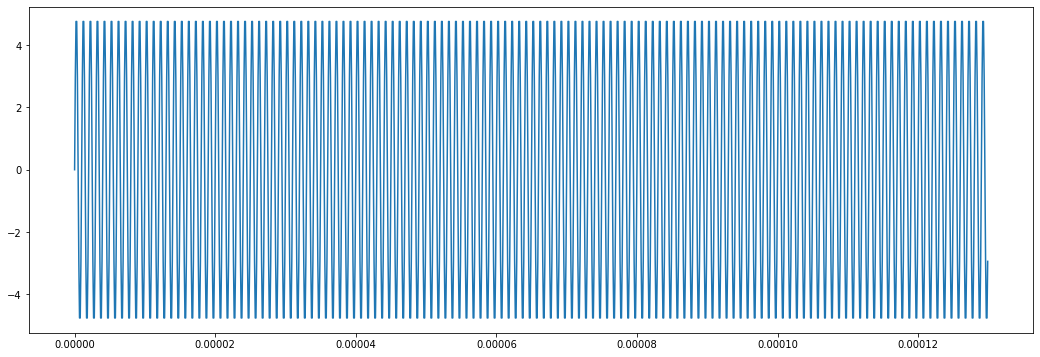

In [ ]:

'''
Ac - Amplitude of the carrier signal
fc - Frequency of the carrier signal
tc - Time variable of the carrier the signal
xc - Carrier signal row vector 
'''
Ac = 5                         
fc =round(10*bit_rate)
tc = np.arange(0,N*Time,Time/T)
xc = Ac * np.sin(2.0 * np.pi * fc * tc)
# xc - Carrier signal
plot_signal(tc, xc)

**Step 3: Multiplying NRZ  digital signal by the carrier signal**

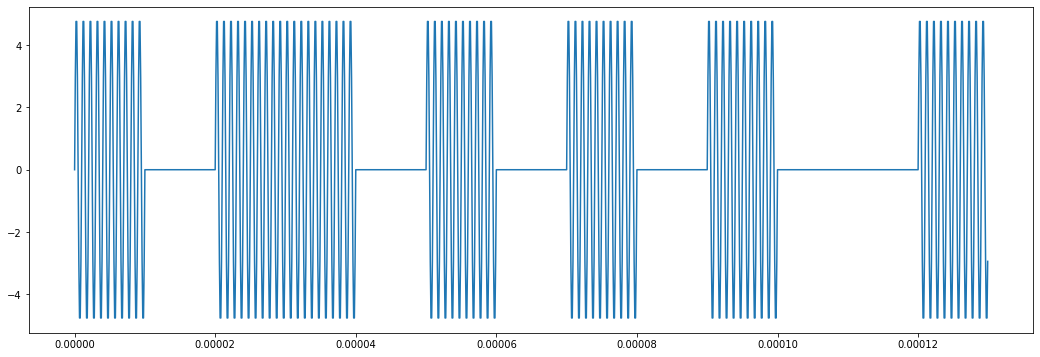

In [ ]:
modulated_signal = x * xc
plot_signal(tc, modulated_signal)

##**Frequency Shift Keying(FSK)**

**Step 1: $Unipolar$ - $NRZ$ Encoding**

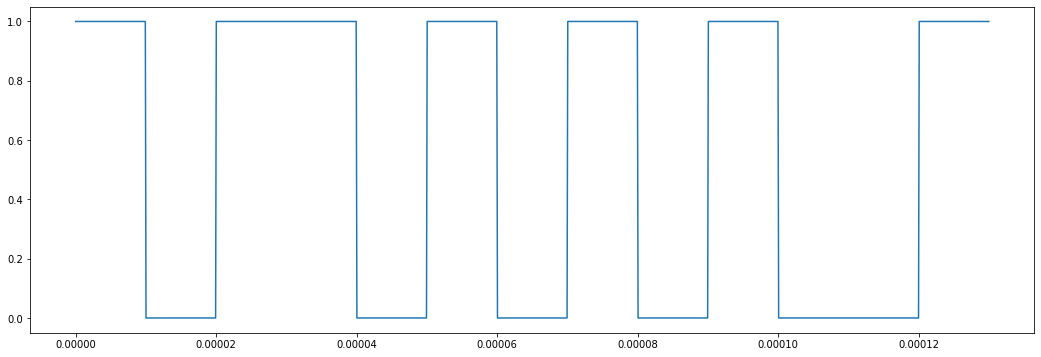

In [ ]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
N         -      Bit Length of input bits
T         -      Digital Signal per bit
x         -      Line coding row vector(Digital Signal)
t         -      Time vector for Digial Signal
'''

bits = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1])
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Assigning one carrier signal with two types of frequencies for two levels.**

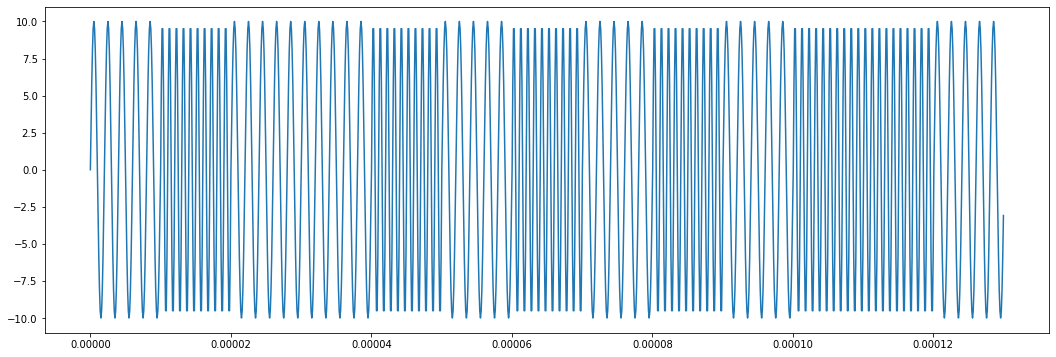

In [ ]:

'''
A   - Amplitude of the carrier signal
fc1 - Frequency of the carrier signal for 1
fc2 - Frequency of the carrier signal for 0
tc  - Time variable of the carrier the signal for one data element
fsk_modulated_signal  - FSK modulated signal 
'''
A = 10                       
fc1 =round(5*bit_rate)
fc2 =round(10*bit_rate)
tc = np.arange(0, Time, Time/T)
fsk_modulated_signal = np.array([])
for i in range(N):
  if bits[i] == 1:
    sig = A * np.sin(2.0 * np.pi * fc1 * tc)
    fsk_modulated_signal = np.append(fsk_modulated_signal, sig)
  else:
    sig = A * np.sin(2.0 * np.pi * fc2 * tc)
    fsk_modulated_signal = np.append(fsk_modulated_signal, sig)
  
# fsk_modulated_signal - FSK Modulated signal
plot_signal(t, fsk_modulated_signal)

##**Phase Shift Keying(PSK)**

**Step 1: $Unipolar$ - $NRZ$ Encoding**

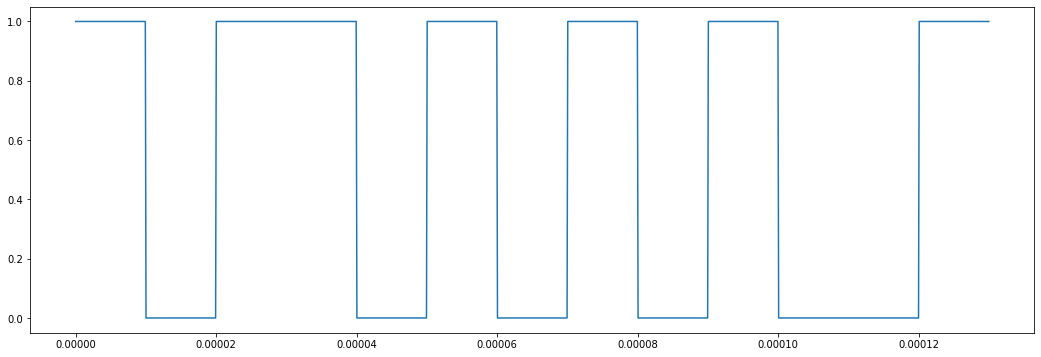

In [ ]:
'''

bits      -      Digital data elements(input bits row vector)
Time      -      Time period for sending 1 data elements
bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
N         -      Bit Length of input bits
T         -      Digital Signal per bit
x         -      Line coding row vector(Digital Signal)
t         -      Time vector for Digial Signal
'''

bits = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1])
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Assigning one carrier signal with two types of phases for two levels.**

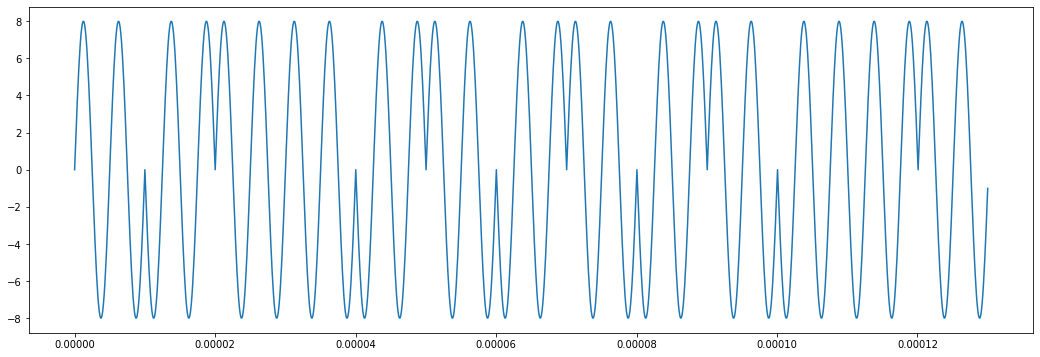

In [ ]:

'''
A  - Amplitude of the carrier signal
fc  - Frequency of the carrier signal
ph1 - Phase of the carrier signal for 1
ph2 - Phase of the carrier signal for 0
tc  - Time variable of the carrier the signal for one data element
psk_modulated_signal  - PSK modulated signal
'''
A = 8                       
fc =round(2*bit_rate)
ph1 = 0
ph2 = np.pi
tc = np.arange(0, Time, Time/T)
psk_modulated_signal = np.array([])
for i in range(N):
  if bits[i] == 1:
    signal = A * np.sin((2.0 * np.pi * fc * tc) + ph1)
    psk_modulated_signal = np.append(psk_modulated_signal, signal)
  else:
    signal = A * np.sin((2.0 * np.pi * fc * tc) + ph2)
    psk_modulated_signal = np.append(psk_modulated_signal, signal)
  
# PSK Modulated signal
plot_signal(t, psk_modulated_signal)